## ***Importing Required Libraries***

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## ***Morphological Transformation***

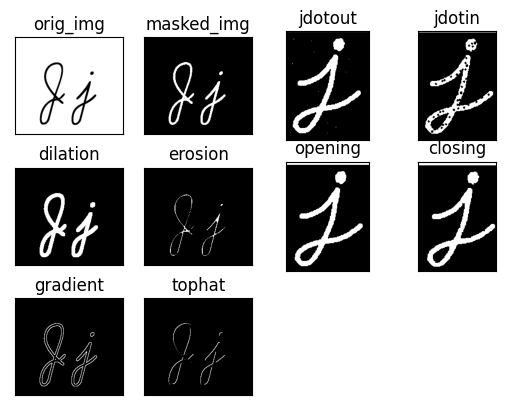

In [12]:
# img = cv2.imread('smarties.png',cv2.IMREAD_GRAYSCALE)
img = cv2.imread('j.png',cv2.IMREAD_GRAYSCALE)
jdo = cv2.imread('jdotout.png',cv2.IMREAD_GRAYSCALE)
jdi = cv2.imread('jdotin.png',cv2.IMREAD_GRAYSCALE)

_,masked_img = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
_,jdotout = cv2.threshold(jdo,220,255,cv2.THRESH_BINARY)
_,jdotin = cv2.threshold(jdi,220,255,cv2.THRESH_BINARY)

kernal = np.ones((2,2),np.uint8) #normally a square or shape which we want to apply on image. Kernal of numpy ones which means white square of balls

dilation = cv2.dilate(masked_img,kernal,iterations=3)
erosion = cv2.erode(masked_img,kernal,iterations=3)


opening = cv2.morphologyEx(jdotout,cv2.MORPH_OPEN,kernal,iterations=4) #erosion followed by dilation
closing = cv2.morphologyEx(jdotin,cv2.MORPH_CLOSE,kernal,iterations=4) #dilation followed by erosion
gradient = cv2.morphologyEx(masked_img,cv2.MORPH_GRADIENT,kernal) #difference bw dilation and erosion
tophat = cv2.morphologyEx(masked_img,cv2.MORPH_TOPHAT,kernal) #difference bw image and opening of image

# cv2.imshow('jdotout',jdotout)
# cv2.imshow('opening',opening)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

titles = ['orig_img','masked_img','jdotout','jdotin','dilation','erosion','opening','closing','gradient','tophat']
images = [img,masked_img,jdotout,jdotin,dilation,erosion,opening,closing,gradient,tophat]
for i in range(len(images)):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

## ***Gradient and Edge Detection***

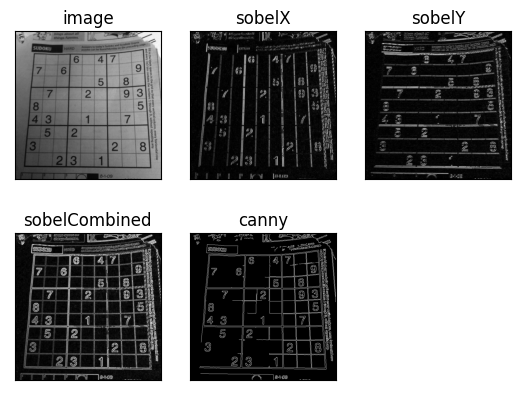

In [18]:
img = cv2.imread('sudoku.png',cv2.IMREAD_GRAYSCALE)
# img = cv2.medianBlur(img,5)
# img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

sobelX = cv2.Sobel(img,cv2.CV_64F,1,0)
sobelY = cv2.Sobel(img,cv2.CV_64F,0,1) #returns black and white image

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX,sobelY)

canny = cv2.Canny(img,100,200) #threshold value of intensity gradient.

titles = ['image','sobelX','sobelY','sobelCombined','canny']
images = [img,sobelX,sobelY,sobelCombined,canny]

for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## ***Canny Edge Detection***

In [20]:
def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("TH1","Tracking",0,255,nothing)
cv2.createTrackbar("TH2","Tracking",0,255,nothing)

while True:

    img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

    th1 = cv2.getTrackbarPos("TH1","Tracking")
    th2 = cv2.getTrackbarPos("TH2","Tracking")

    canny = cv2.Canny(img,th1,th2) #lesser noise in canny edge detection

    cv2.imshow("image",img)
    cv2.imshow("canny",canny)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

## ***Split & Merge***

In [14]:
img = cv2.imread('messi5.jpg',-1)

b,g,r=cv2.split(img) #split into bgr channel
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)
img = cv2.merge((b,g,r)) #merge bgr channel

ball = img[280:340,330:390] 
img[273:333,100:160] = ball

# cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## ***Adding two Images***

In [7]:
img = cv2.imread('messi5.jpg')
img2=cv2.imread('opencv-logo.png')

img = cv2.resize(img,(512,512))
img2 = cv2.resize(img2,(512,512))

# output_image=cv2.add(img,img2)
output_image=cv2.addWeighted(img,0.9,img2,0.1,0) #0.9 and 0.1 are weight of each image

cv2.imshow('image',output_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

## ***Colour Detection using HSV color space***

In [ ]:
# 61 238 178 / 121 255 255 for green
# 82 51 51 / 133 255 255 for blue
# 61 58 51 / 136 255 255 for both GB
def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH","Tracking",0,255,nothing)
cv2.createTrackbar("LS","Tracking",0,255,nothing)
cv2.createTrackbar("LV","Tracking",0,255,nothing)
cv2.createTrackbar("UH","Tracking",255,255,nothing)
cv2.createTrackbar("US","Tracking",255,255,nothing)
cv2.createTrackbar("UV","Tracking",255,255,nothing)

while True:
    frame = cv2.imread('smarties.png')

    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH","Tracking")
    l_s = cv2.getTrackbarPos("LS","Tracking")
    l_v = cv2.getTrackbarPos("LV","Tracking")

    u_h = cv2.getTrackbarPos("UH","Tracking")
    u_s = cv2.getTrackbarPos("US","Tracking")
    u_v = cv2.getTrackbarPos("UV","Tracking")

    l_b = np.array([l_h,l_s,l_v])
    u_b = np.array([u_h,u_s,u_v])

    mask = cv2.inRange(hsv,l_b,u_b)
    res = cv2.bitwise_and(frame,frame,mask=mask)

    cv2.imshow("frame",frame)
    cv2.imshow("mask",mask)
    cv2.imshow("res",res)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

## ***Motion Detection and Tracking Using Opencv Contours***

In [50]:
cap = cv2.VideoCapture('peoplewalking.mp4')

while (cap.isOpened()):
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()

    if ret == True:
        diff = cv2.absdiff(frame1,frame2)
        # cv2.imshow("feed", diff)
        gray = cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray,(5,5),0)
        _,thresh = cv2.threshold(blur,20,255,cv2.THRESH_BINARY)
        dilated = cv2.dilate(thresh,None,iterations=3)
        contours,_=cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            (x,y,w,h) = cv2.boundingRect(contour)

            if cv2.contourArea(contour) < 900:
                continue
            cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),2)
        # cv2.drawContours(frame1,contours,-1,(0,255,0),2)
        
        cv2.imshow("feed", frame1)
        frame1 = frame2
        ret,frame2=cap.read()

        if cv2.waitKey (40) == 27: 
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()